## This will use 2014 data with matching 2000 data for a paired t test

In [1]:
import pandas as pd

In [2]:
#import datasets
df2000 = pd.read_csv("geo_df2000.csv")
df2014 = pd.read_csv("geo_df2014.csv")

In [3]:
#look at the column names
df2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UNITID     445 non-null    int64  
 1   efrace15   445 non-null    int64  
 2   efrace16   445 non-null    int64  
 3   W/M_Ratio  445 non-null    float64
 4   INSTNM     445 non-null    object 
 5   CITY       445 non-null    object 
 6   STABBR     445 non-null    object 
 7   ZIP        445 non-null    object 
 8   LATITUDE   445 non-null    float64
 9   LONGITUDE  445 non-null    float64
 10  geometry   445 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 38.4+ KB


In [4]:
#rename for clarity and add a total students column
df2000.rename(columns={'efrace15' : 'MEN', 'efrace16' : 'WOMEN'}, inplace=True)
df2000['TOTALSTUDENTS'] = df2000['MEN'] + df2000['WOMEN']

In [5]:
#add a "percent women" column
df2000['PERCENT_WOMEN'] = df2000['WOMEN']/df2000['TOTALSTUDENTS']

In [6]:
df2000.head()

,UNITID,MEN,WOMEN,W/M_Ratio,INSTNM,CITY,STABBR,ZIP,LATITUDE,LONGITUDE,geometry,TOTALSTUDENTS,PERCENT_WOMEN
0,100663,307,87,0.283388,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,POINT (-86.799345 33.505697),394,0.220812
1,100706,650,224,0.344615,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,POINT (-86.640449 34.724557),874,0.256293
2,100751,887,252,0.284104,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,POINT (-87.54597800000001 33.211875),1139,0.221247
3,100858,2396,526,0.219533,Auburn University,Auburn,AL,36849,32.599378,-85.488258,POINT (-85.488258 32.599378),2922,0.180014
4,101480,15,1,0.066667,Jacksonville State University,Jacksonville,AL,36265,33.822938,-85.765321,POINT (-85.765321 33.822938),16,0.062500


In [7]:
#examine the dataset column names
df2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UNITID     647 non-null    int64  
 1   EFTOTLT    647 non-null    int64  
 2   EFTOTLM    647 non-null    int64  
 3   EFTOTLW    647 non-null    int64  
 4   W/M_Ratio  647 non-null    float64
 5   INSTNM     647 non-null    object 
 6   CITY       647 non-null    object 
 7   STABBR     647 non-null    object 
 8   ZIP        647 non-null    object 
 9   LATITUDE   647 non-null    float64
 10  LONGITUDE  647 non-null    float64
 11  geometry   647 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 60.8+ KB


In [8]:
#rename columns for clarity and to match the 2000 dataset
df2014.rename(columns={'EFTOTLM' : 'MEN', 'EFTOTLW' : 'WOMEN', 'EFTOTLT': 'TOTALSTUDENTS'}, inplace=True)

In [9]:
#add a "percent women" column
df2014['PERCENT_WOMEN'] = df2014['WOMEN']/df2014['TOTALSTUDENTS']
df2014.head()

,UNITID,TOTALSTUDENTS,MEN,WOMEN,W/M_Ratio,INSTNM,CITY,STABBR,ZIP,LATITUDE,LONGITUDE,geometry,PERCENT_WOMEN
0,100654,527,430,97,0.225581,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,POINT (-86.568502 34.783368),0.184061
1,100663,496,359,137,0.381616,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,POINT (-86.799345 33.505697),0.276210
2,100706,1843,1490,353,0.236913,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,POINT (-86.640449 34.724557),0.191536
3,100751,4191,3219,972,0.301957,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,POINT (-87.54597800000001 33.211875),0.231926
4,100858,4760,3934,826,0.209964,Auburn University,Auburn,AL,36849,32.599378,-85.488258,POINT (-85.488258 32.599378),0.173529


There are 462 schools in 2000, but 678 in 2014. 
<br>
For a true matched t-test we have to be comparing the same thing.
<br>
I'm going to join the two dataframes with a left join and keep only the matching values.

In [10]:
# perform a left join on the UNITID column
df2000_2014 = pd.merge(df2000, df2014, on= "UNITID", how = 'left')
df2000_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 0 to 444
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           445 non-null    int64  
 1   MEN_x            445 non-null    int64  
 2   WOMEN_x          445 non-null    int64  
 3   W/M_Ratio_x      445 non-null    float64
 4   INSTNM_x         445 non-null    object 
 5   CITY_x           445 non-null    object 
 6   STABBR_x         445 non-null    object 
 7   ZIP_x            445 non-null    object 
 8   LATITUDE_x       445 non-null    float64
 9   LONGITUDE_x      445 non-null    float64
 10  geometry_x       445 non-null    object 
 11  TOTALSTUDENTS_x  445 non-null    int64  
 12  PERCENT_WOMEN_x  445 non-null    float64
 13  TOTALSTUDENTS_y  405 non-null    float64
 14  MEN_y            405 non-null    float64
 15  WOMEN_y          405 non-null    float64
 16  W/M_Ratio_y      405 non-null    float64
 17  INSTNM_y        

In [11]:
df2000_2014

,UNITID,MEN_x,WOMEN_x,W/M_Ratio_x,INSTNM_x,CITY_x,STABBR_x,ZIP_x,LATITUDE_x,LONGITUDE_x,...,WOMEN_y,W/M_Ratio_y,INSTNM_y,CITY_y,STABBR_y,ZIP_y,LATITUDE_y,LONGITUDE_y,geometry_y,PERCENT_WOMEN_y
0,100663,307,87,0.283388,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,...,137.0,0.381616,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,POINT (-86.799345 33.505697),0.276210
1,100706,650,224,0.344615,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,...,353.0,0.236913,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,POINT (-86.640449 34.724557),0.191536
2,100751,887,252,0.284104,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,...,972.0,0.301957,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,POINT (-87.54597800000001 33.211875),0.231926
3,100858,2396,526,0.219533,Auburn University,Auburn,AL,36849,32.599378,-85.488258,...,826.0,0.209964,Auburn University,Auburn,AL,36849,32.599378,-85.488258,POINT (-85.488258 32.599378),0.173529
4,101480,15,1,0.066667,Jacksonville State University,Jacksonville,AL,36265,33.822938,-85.765321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,243780,4827,1097,0.227263,Purdue University-Main Campus,West Lafayette,IN,47907-2040,40.428206,-86.914435,...,1823.0,0.301123,Purdue University-Main Campus,West Lafayette,IN,47907-2040,40.428206,-86.914435,POINT (-86.914435 40.428206),0.231433
441,412599,73,18,0.246575,Remington College-Memphis Campus,Memphis,TN,38132,35.071403,-89.989881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,436818,33,5,0.151515,University of Connecticut-Waterbury Campus,Waterbury,CT,6702,41.555617,-73.039242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,436827,7,2,0.285714,University of Connecticut-Avery Point,Groton,CT,06340-6097,41.316419,-72.065336,...,3.0,0.500000,University of Connecticut-Avery Point,Groton,CT,06340-6097,41.316419,-72.065336,POINT (-72.065336 41.316419),0.333333


In [12]:
# drop any rows with an NA in them - this will eliminate any information from 2014 that does not
# have a pair in 2000 and vice versa
df2000_2014_1 = df2000_2014.dropna(axis = 0)

In [13]:
df2000_2014_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 444
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           405 non-null    int64  
 1   MEN_x            405 non-null    int64  
 2   WOMEN_x          405 non-null    int64  
 3   W/M_Ratio_x      405 non-null    float64
 4   INSTNM_x         405 non-null    object 
 5   CITY_x           405 non-null    object 
 6   STABBR_x         405 non-null    object 
 7   ZIP_x            405 non-null    object 
 8   LATITUDE_x       405 non-null    float64
 9   LONGITUDE_x      405 non-null    float64
 10  geometry_x       405 non-null    object 
 11  TOTALSTUDENTS_x  405 non-null    int64  
 12  PERCENT_WOMEN_x  405 non-null    float64
 13  TOTALSTUDENTS_y  405 non-null    float64
 14  MEN_y            405 non-null    float64
 15  WOMEN_y          405 non-null    float64
 16  W/M_Ratio_y      405 non-null    float64
 17  INSTNM_y        

Now we have a dataset containing only the universities with information in both 2000 and 2014.
The X columns represent 2000 and Y columns represent 2014 data.

Lets perform the dependent T test to see if the means are the same.

In [14]:
#import needed packages
from scipy import stats
import numpy as np

Frist lets check for normality for the percentages of women at each time point.

<AxesSubplot:>

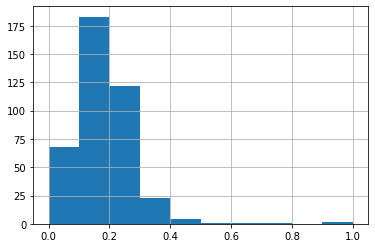

In [15]:
df2000_2014_1['PERCENT_WOMEN_x'].hist()

<AxesSubplot:>

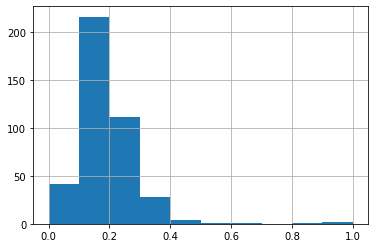

In [16]:
df2000_2014_1['PERCENT_WOMEN_y'].hist()

Both have a relatively normal shape here. I'm going to proceed with the test, and then compare the test to one with transformed data to see if there is a difference in the outcome.

In [17]:
#run a matched t test
stats.ttest_rel(df2000_2014_1['PERCENT_WOMEN_x'], df2000_2014_1['PERCENT_WOMEN_y'])

Ttest_relResult(statistic=-1.7791959625886116, pvalue=0.07595938453804013)

The results are NOT significant (p > .05) therefore the means are NOT different.

There is no change in mean percentage of women from 2000 to 2014.

### Now lets double check the result with transformed data

In [18]:
#create a column of transformed "percent women x" data
df2000_2014_1['PERCENT_WOMEN_x_SQRT'] = np.sqrt(df2000_2014_1['PERCENT_WOMEN_x'])

C:\Users\ering\AppData\Local\Temp\ipykernel_23244\3879951092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2000_2014_1['PERCENT_WOMEN_x_SQRT'] = np.sqrt(df2000_2014_1['PERCENT_WOMEN_x'])


<AxesSubplot:>

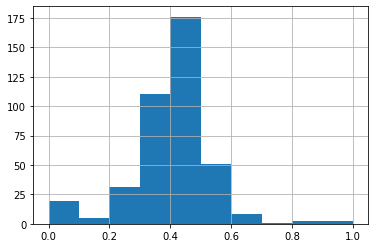

In [19]:
#look at the transformed data for normality
df2000_2014_1['PERCENT_WOMEN_x_SQRT'].hist()

Much more normally distributed thi time - we'll keep this.

In [20]:
#create a column of transformed "percent women y" data
df2000_2014_1['PERCENT_WOMEN_y_SQRT'] = np.sqrt(df2000_2014_1['PERCENT_WOMEN_y'])

C:\Users\ering\AppData\Local\Temp\ipykernel_23244\3292277237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2000_2014_1['PERCENT_WOMEN_y_SQRT'] = np.sqrt(df2000_2014_1['PERCENT_WOMEN_y'])


<AxesSubplot:>

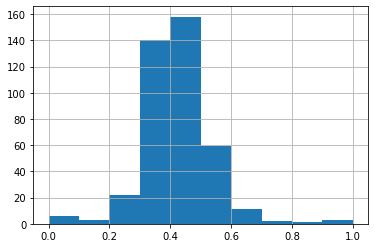

In [21]:
#look at transformed data for normality
df2000_2014_1['PERCENT_WOMEN_y_SQRT'].hist()

This looks much more normal as well

In [22]:
# perform matched t test on transformed data to see if result is different from result from un-transformed data
stats.ttest_rel(df2000_2014_1['PERCENT_WOMEN_x_SQRT'], df2000_2014_1['PERCENT_WOMEN_y_SQRT'])

Ttest_relResult(statistic=-2.7204471219887347, pvalue=0.0068009363124293225)

The test is significant with transformed data, so let's look closer.

### Lets look at means and see what's going on here

In [23]:
mean2000 = df2000_2014_1['PERCENT_WOMEN_x'].mean()
mean2000

0.1810076823422021

In [24]:
mean2014 = df2000_2014_1['PERCENT_WOMEN_y'].mean()
mean2014

0.1915059882902816

In 2000 the Mean percentage of women was 18%. It had risen to 19% by 2014. This is a small change, but statistically significant.

Is the subset of the 2014 data matched to the 2000 data representative of the whole of the 2014 data?
Check and see if the means are the same or different...

In [25]:
df2014['PERCENT_WOMEN'].mean()

0.19007250895642444

In [26]:
from scipy.stats import ttest_ind

In [27]:
ttest_ind(df2000_2014_1['PERCENT_WOMEN_y'], df2014['PERCENT_WOMEN'])

Ttest_indResult(statistic=0.17680403558924704, pvalue=0.859696415577908)

The pvalue is not significant - the means are not different.
We can say that the subset of the 2014 data matched to the 2000 data is the same. It is representative.